# Retail Analysis with Walmart Data

# Analysis Tasks

1. Basic Statistics tasks

1. 1 Which store has maximum sales

1. 2 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

1. 3 Which store/s has good quarterly growth rate in Q3’2012

1. 4 Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

1. 5 Provide a monthly and semester view of sales in units and give insights

2. Statistical Model

For Store 1 – Build  prediction models to forecast demand

2. 1 Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

2. 2 Change dates into days by creating new variable.

In [117]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [6]:
# Load dataset
data = pd.read_csv('D:\\walmart_store_sales\\Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# check shape of data
data.shape

(6435, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
da

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

1. 1 Which store has maximum sales

In [10]:
sales_list=[]
sales_list=data.groupby(['Store'])['Weekly_Sales'].sum()
max_sales=max(data.groupby(['Store'])['Weekly_Sales'].sum())
sales_list

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

In [11]:
for i in range(1,46):
    if max_sales==sales_list[i]:
        print("Store which has maximum sales of {} is {}".format(max_sales,i))

Store which has maximum sales of 301397792.46 is 20


1. 2 Which store has maximum standard deviation 

In [14]:
std_dev=[]
std_dev=data.groupby(['Store'])['Weekly_Sales'].std()
max_std=max(data.groupby(['Store'])['Weekly_Sales'].std())
print(std_dev)

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64


In [15]:
for i in range(1,46):
    if max_std==std_dev[i]:
        print('Store which has maximum standard deviation of {} is {}'.format(max_std,i))

Store which has maximum standard deviation of 317569.9494755081 is 14


Store 14 has maximum standard deviation of 317569.9494755081

1. 3 Which store/s has good quarterly growth rate in Q3’2012

In [32]:
data_safe=data

In [33]:
data["Date"]=pd.to_datetime(data["Date"])

In [35]:
#Third Quartile Period

date_from=pd.Timestamp(date(2012,7,1))
date_to = pd.Timestamp(date(2012,9,1))

In [36]:
data_safe = data_safe[
    (data_safe['Date'] > date_from ) &
    (data_safe['Date'] < date_to)]

In [37]:
data_safe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,6,8,2012
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,13,7,2012
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,20,7,2012
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,27,7,2012
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908,17,8,2012
...,...,...,...,...,...,...,...,...,...,...,...
6421,45,2012-07-27,711671.58,0,77.20,3.647,191.165566,8.684,27,7,2012
6424,45,2012-08-17,722496.93,0,75.71,3.807,191.228492,8.684,17,8,2012
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684,24,8,2012
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,31,8,2012


In [40]:
Q3_growth=[]
Q3_growth=data_safe.groupby(['Store'])['Weekly_Sales'].sum()
max_Q3_growth=max(data_safe.groupby(['Store'])['Weekly_Sales'].sum())
print(Q3_growth)
print(max_Q3_growth)

Store
1     12497164.63
2     15068546.49
3      3309539.61
4     17184755.18
5      2616077.17
6     12602014.74
7      5145719.21
8      7287654.54
9      4379738.32
10    14244984.38
11    10859741.55
12     7975256.52
13    16547587.90
14    13476932.21
15     4749680.33
16     4439284.00
17     7691713.66
18     8487908.30
19    11238000.13
20    16441784.91
21     5705679.85
22     8011276.00
23    11874225.21
24    11036817.80
25     5660441.24
26     8477063.95
27    13966116.82
28     9985386.04
29     4169231.08
30     3428281.56
31    11035442.71
32     9545018.65
33     2116785.52
34     7672976.76
35     7047799.89
36     2393072.59
37     4150660.97
38     3437491.66
39    12930297.16
40     7972353.84
41    11238592.05
42     4551141.89
43     4935069.08
44     2677995.56
45     5935775.03
Name: Weekly_Sales, dtype: float64
17184755.18


In [56]:
max_Q3_growth

17184755.18

1. 4 Some holidays have a negative impact on sales.

In [58]:
Christmas_sales=data.loc[(data["Date"]=="2010-12-31") | (data["Date"]=="2011-12-31") | (data["Date"]=="2012-12-28") | (data["Date"]=="2013-12-")]
Christmas_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,31,12,2010
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163,31,12,2010
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564,31,12,2010
476,4,2010-12-31,1794868.74,1,38.09,2.955,127.087677,7.127,31,12,2010
619,5,2010-12-31,298180.18,1,49.79,2.943,211.956714,6.768,31,12,2010


In [57]:
Christmas_sales["Weekly_Sales"].sum()

40432519.0

In [61]:
Labour_Day=data.loc[(data["Date"]=="2010-09-10") | (data["Date"]=="2011-09-09") | (data["Date"]=="2012-09-07") | (data["Date"]=="2013-09-06")]
Labour_Day.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962,9,9,2011
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852,9,9,2011
369,3,2011-09-09,377347.49,1,81.72,3.546,219.213530,7.567,9,9,2011
512,4,2011-09-09,2093139.01,1,73.34,3.554,129.368613,5.644,9,9,2011
655,5,2011-09-09,321110.22,1,79.04,3.546,216.422682,6.529,9,9,2011


In [63]:
Labour_Day["Weekly_Sales"].sum()

46763227.529999994

In [65]:
Thanksgivings=data.loc[(data["Date"]=="2010-11-26") | (data["Date"]=="2011-11-25") | (data["Date"]=="2012-11-23") | (data["Date"]=="2013-11-29")]
Thanksgivings.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,26,11,2010
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,25,11,2011
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163,26,11,2010
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441,25,11,2011
328,3,2010-11-26,565567.84,1,68.71,2.735,215.061403,7.564,26,11,2010


In [66]:
Thanksgivings["Weekly_Sales"].sum()

132414608.5

Conclusion

1. Holidays which have higher sales is Thanksgivings
2. Total weekly sales of thanksgiving holidays is 132414608.5
3. Total sales in Labour day is 46763227.5
4. Total sales in christmas holidays is 40432519.0

1. 5 Provide a monthly and semester view of sales in units and give insights

In [68]:
data["Year"]= pd.DatetimeIndex(data['Date']).year
data["Month"]= pd.DatetimeIndex(data['Date']).month

In [71]:
year_2010=data.loc[data["Year"]==2010]
year_2011=data.loc[data["Year"]==2011]
year_2012=data.loc[data["Year"]==2012]

Text(0.5, 1.0, 'Monthly view of sales in 2010')

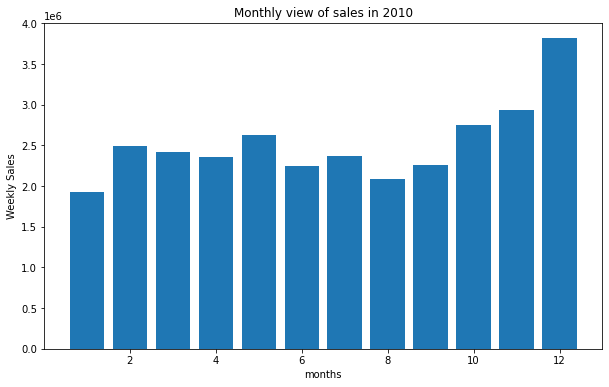

In [76]:
# Monthly view of sales in 2010

plt.figure(figsize=(10,6))
plt.bar(year_2010["Month"],year_2010["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")

Text(0.5, 1.0, 'Monthly view of sales in 2011')

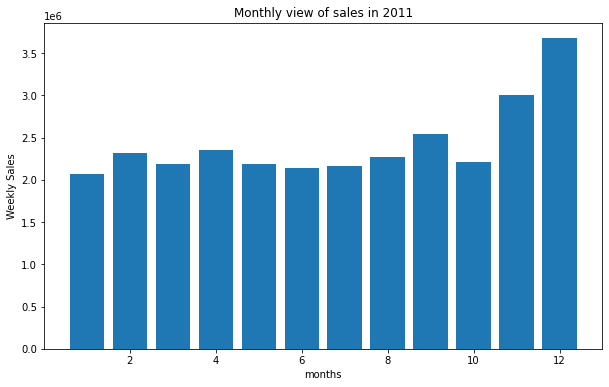

In [77]:
# Monthly view of sales in 2011
plt.figure(figsize=(10,6))
plt.bar(year_2011["Month"],year_2011["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")

Text(0.5, 1.0, 'Monthly view of sales in 2012')

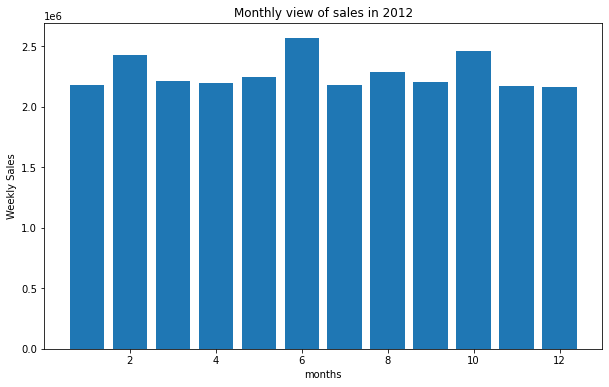

In [78]:
# Monthly view of sales in 2012

plt.figure(figsize=(10,6))
plt.bar(year_2012["Month"],year_2012["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")

Text(0.5, 1.0, 'Monthly view of sales')

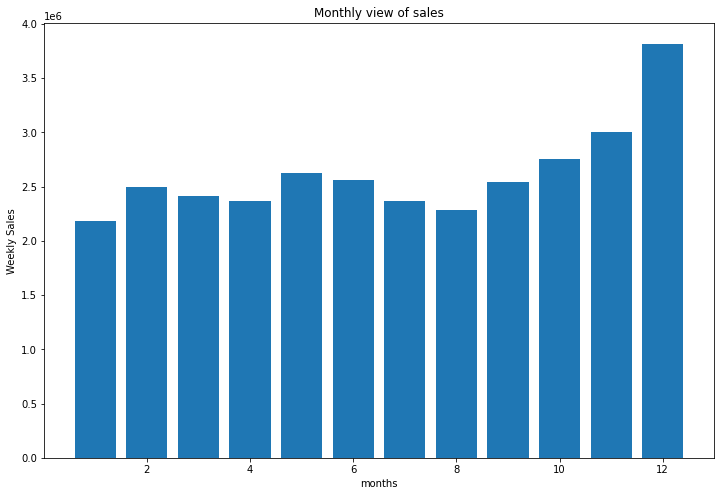

In [82]:
# All months view of sales

plt.figure(figsize=(12,8))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

In [83]:
# Semesterwise sale 
semester_sales=[]
semester_sales.append(year_2010.loc[year_2010["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2010.loc[year_2010["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(year_2011.loc[year_2011["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2011.loc[year_2011["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(year_2012.loc[year_2012["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2012.loc[year_2012["Month"]>6,["Weekly_Sales"]].sum())

In [84]:
semester_names=["sem1_2010","sem2_2010","sem1_2011","sem2_2011","sem1_2012","sem2_2012"]

Text(0.5, 1.0, 'Semester view of sales')

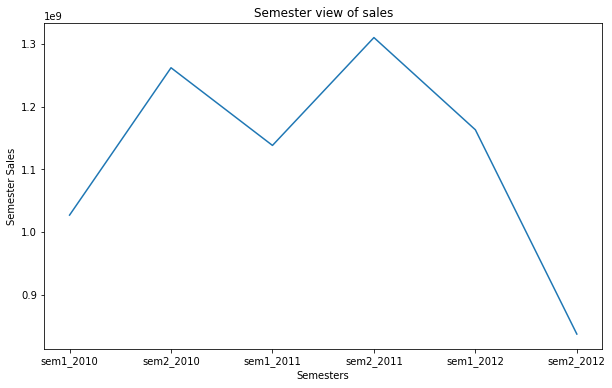

In [85]:
plt.figure(figsize=(10,6))
plt.plot(semester_names,semester_sales)
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

2. Statistical Model
For Store 1 – Build  prediction models to forecast demand
2. 1 Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [86]:
x=data.drop(["Weekly_Sales","Date"],axis=1)
y=data["Weekly_Sales"]

In [87]:
linreg=LinearRegression(n_jobs=-1)

In [97]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.4,random_state=42)

In [98]:
linreg.fit(xtrain,ytrain)

LinearRegression(n_jobs=-1)

In [99]:
linreg.intercept_

84171361.04320985

In [100]:
linreg.coef_

array([-15076.05743532,  14940.56392359,   -744.77138548,  49882.84830669,
        -2178.75498529, -26725.92004156,  -1452.88018785,  11680.40062841,
       -40959.56523516])

In [101]:
x.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

In [102]:
features=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],

<AxesSubplot:>

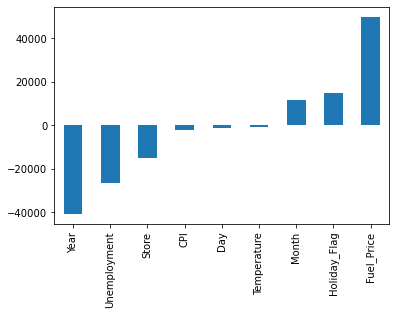

In [103]:
relation=pd.Series(linreg.coef_,x.columns).sort_values()
relation.plot(kind="bar")

In [104]:
linreg.score(xtest,ytest)

0.14950449647465935

In [106]:
sqrt(mean_squared_error(ytrain,linreg.predict(xtrain)))

522476.3098596038

In [107]:
mean_squared_error(ytest,linreg.predict(xtest))

270207867997.983

Text(0, 0.5, 'Weekly Sales')

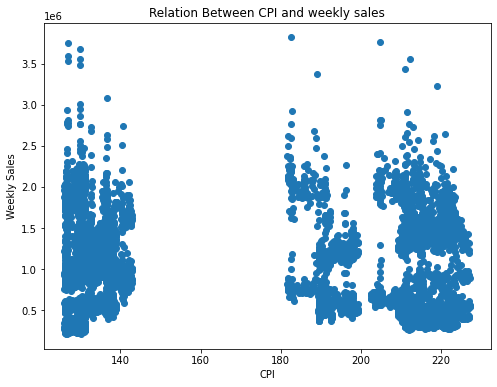

In [110]:
#Relation Between CPI and weekly sales

plt.figure(figsize=(8,6))
plt.scatter(data["CPI"],data["Weekly_Sales"])
plt.title("Relation Between CPI and weekly sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")

Text(0, 0.5, 'Weekly Sales')

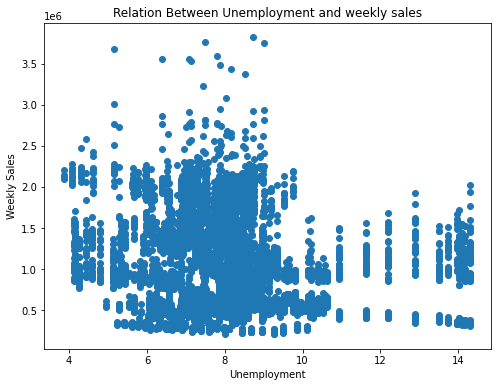

In [112]:
#Relation Between Unemployment and weekly sales

plt.figure(figsize=(8,6))
plt.scatter(data["Unemployment"],data["Weekly_Sales"])
plt.title("Relation Between Unemployment and weekly sales")
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")

Text(0, 0.5, 'Weekly Sales')

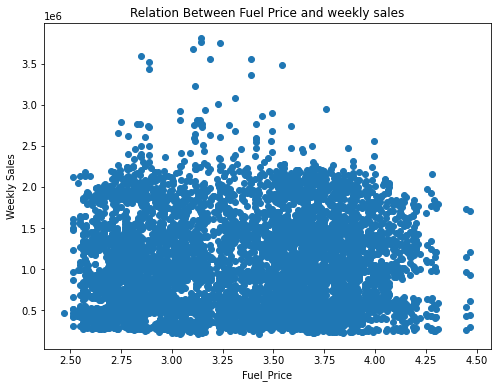

In [114]:
#Relation Between Fuel Price and weekly sales
plt.figure(figsize=(8,6))
plt.scatter(data["Fuel_Price"],data["Weekly_Sales"])
plt.title("Relation Between Fuel Price and weekly sales")
plt.xlabel("Fuel_Price")
plt.ylabel("Weekly Sales")

2. 2 Change dates into days by creating new variable.

In [115]:
data['days'] = data['Date'].dt.day_name()

In [116]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Friday
